**Table of Contents**




 -- Data Preparation


 -- Data Preprocessing


 -- Model Selection

 -- Model Training

 -- Making Predictions

 -- Model Evaluation

--  Visualization of Results

--  Comparison of Models

--  Saving the Best Model

In [ ]:
#Import Neccessary Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import joblib
from joblib import dump
from joblib import load


# **Step 1: Data Preparation**

**Import Libraries:**
Prepare the environment by importing tools needed for data handling, analysis, and visualization.

**Connect and Load Dataset:**
Access the dataset from a specified source, load it into the workspace, and review its contents for quality and structure.

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the Dataset
df = pd.read_csv('/content/drive/MyDrive/LINEAR_REGRESSION SUMMATIVE/Data/Food Waste data.csv')
df.head()



,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


# **Step 2: Data Preprocessing**

1.**Identifying the columns data type**

2.**One-Hot Encode the Categorical Columns**

Convert categorical variables into numerical format using a label encoder. This ensures that machine learning models can interpret and process the data correctly.








In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 214 non-null    object
 1   combined figures (kg/capita/year)       214 non-null    int64 
 2   Household estimate (kg/capita/year)     214 non-null    int64 
 3   Household estimate (tonnes/year)        214 non-null    int64 
 4   Retail estimate (kg/capita/year)        214 non-null    int64 
 5   Retail estimate (tonnes/year)           214 non-null    int64 
 6   Food service estimate (kg/capita/year)  214 non-null    int64 
 7   Food service estimate (tonnes/year)     214 non-null    int64 
 8   Confidence in estimate                  214 non-null    object
 9   M49 code                                214 non-null    int64 
 10  Region                                  214 non-null    object
 11  Source

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# One-hot encode the categorical columns
df_encoded = pd.concat([df, pd.get_dummies(df[categorical_cols], prefix=categorical_cols)], axis=1)

# Drop original categorical columns
df_encoded.drop(columns=categorical_cols, inplace=True)


**Visualizing Correlations and Feature Distributions:**

This step involves analyzing the relationships between features and understanding their distributions:

Correlation Analysis: A heatmap is used to visualize the correlation matrix, highlighting the strength and direction of relationships between variables. This helps identify highly correlated features that may impact the model.

Feature Distributions: Distribution plots are used to explore the spread of individual variables, identify data patterns, detect outliers, and observe skewness or symmetry in the data.

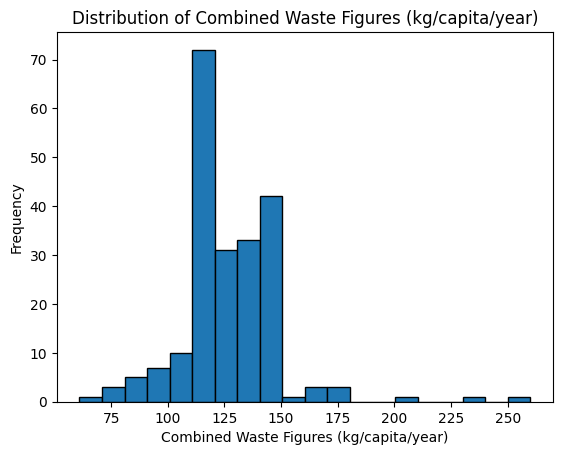

In [ ]:
# Plotting Histogram for  Target Variable 'combined waste figures (kg/capita/year)'
plt.hist(df['combined figures (kg/capita/year)'], bins=20, edgecolor='black')
plt.title('Distribution of Combined Waste Figures (kg/capita/year)')
plt.xlabel('Combined Waste Figures (kg/capita/year)')
plt.ylabel('Frequency')
plt.show()


**Interpretation of the Combined Waste Figures Histogram:**

This histogram shows the distribution of the Combined food waste per capita across each countries. The x-axis represents Combined food waste (kg/capita/year), ranging from 75 to 250. The y-axis shows the frequency, or the number of countries within each range. The distribution is right-skewed, with a peak around 100-125 kg/capita/year, indicating most countries fall within this range. As food waste increases, the frequency decreases, with fe
wer countries reporting higher values.


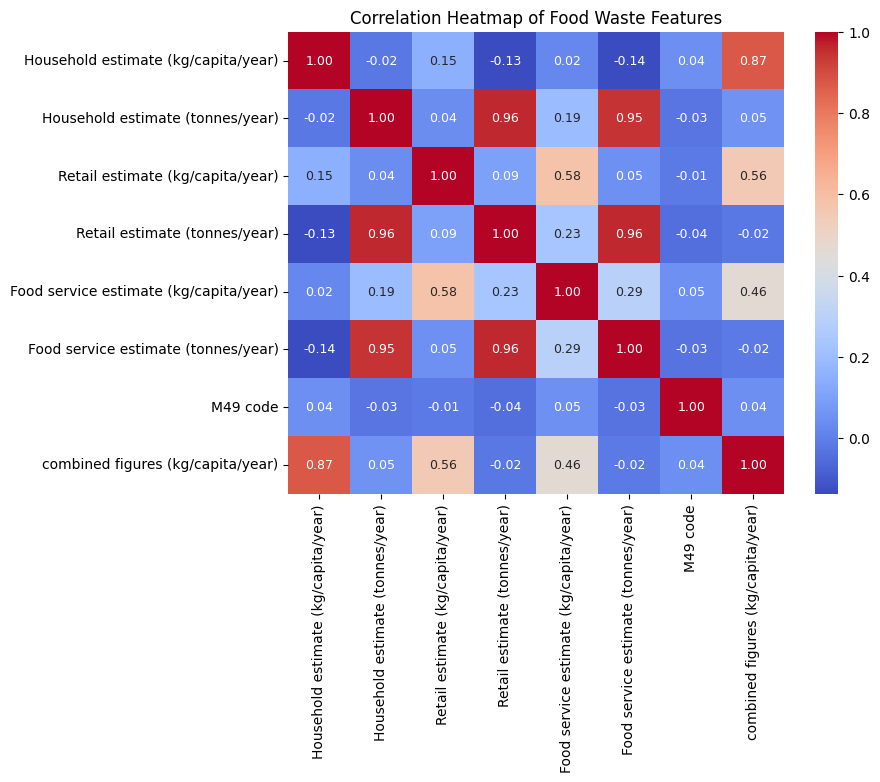

In [ ]:

# Ensure only numeric columns are considered
selected_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Selected columns with relevant features for prediction
selected_columns = ['Household estimate (kg/capita/year)',
                    'Household estimate (tonnes/year)',
                    'Retail estimate (kg/capita/year)',
                    'Retail estimate (tonnes/year)',
                    'Food service estimate (kg/capita/year)',
                    'Food service estimate (tonnes/year)',
                    'Confidence in estimate',
                    'M49 code',
                    'combined figures (kg/capita/year)']

# Creating a subset DataFrame with selected columns
df_1 = df[selected_columns]

# Filter out non-numeric columns (excluding the target variable)
df_1_numeric = df_1.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix for only numeric columns
corr_df1 = df_1_numeric.corr()

# Plotting the heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df1, cmap='coolwarm', fmt=".2f", annot=True, annot_kws={'fontsize':9})
plt.title('Correlation Heatmap of Food Waste Features')
plt.show()



### **Interpretation of the Heatmap Correlation**

**Combined Figures and Household Estimate (kg/capita/year) (Correlation: 0.87):**

 There is a strong positive correlation between these two variables, indicating that food waste per capita in households is closely related to the overall food waste per capita. This suggests that household food waste is a significant contributor to total food waste.

**Combined Figures and Household Estimate (tonnes/year) (Correlation: 0.05):**

A very weak positive correlation exists between these variables, meaning that total household food waste (in tonnes) does not strongly relate or affect the overall food waste per capita.

**Combined Figures and Retail Estimate (kg/capita/year) (Correlation: 0.56):**

A moderate positive correlation is observed, indicating that food waste per capita in retail stores has a reasonable level of association with the overall food waste per capita.

**Combined Figures and Retail Estimate (tonnes/year) (Correlation: -0.02):**

A very weak negative correlation exists, suggesting little to no relationship between total retail food waste (in tonnes) and overall food waste per capita.

**Combined Figures and Food Service Estimate (kg/capita/year) (Correlation: 0.46):**

A moderate positive correlation is observed, indicating some relationship between food waste per capita in food service establishments and the overall food waste per capita.

**Combined Figures and Food Service Estimate (tonnes/year) (Correlation: 0.02)**:

A very weak positive correlation exists between these variables, suggesting little to no relationship between total food service waste (in tonnes) and overall food waste per capita.

**Combined Figures and Confidence in Estimate (Correlation: 0.30):**
A weak positive correlation exists between these variables, suggesting that the confidence level in estimates has a minor relationship with the total food waste per capita

**Combined Figures and M49 code (Correlation: 0.04):**
A very weak positive correlation exists between these variables, indicating almost no relationship between the M49 code (likely a geographic or categorical identifier) and overall food waste per capita.

**Columns to drop:**
To streamline the dataset and avoid redundancy, several columns with weak correlations to the target variable, "combined figures (kg/capita/year)," can be dropped. The Household Estimate (tonnes/year) column, with a very weak correlation of 0.05, does not significantly contribute to predicting food waste per capita and should be removed. Similarly, the Retail Estimate (tonnes/year) column, which has a negligible negative correlation of -0.02, provides little predictive value and can also be eliminated. Additionally, the Food Service Estimate (tonnes/year) column, with a correlation of just 0.02, adds minimal predictive power and should be excluded. Furthermore, the Confidence in Estimate column, with a weak correlation of 0.30, and the M49 Code column, with a very weak correlation of 0.04, offer limited predictive value and should also be dropped. Removing these columns helps reduce noise and redundancy in the dataset while maintaining focus on more relevant features.








In [ ]:
df1 = df_1.drop(['Household estimate (tonnes/year)',
                 'Retail estimate (tonnes/year)',
                 'M49 code',
                 'Food service estimate (tonnes/year)',
                 'Confidence in estimate'], axis=1)
df1.head()


,Household estimate (kg/capita/year),Retail estimate (kg/capita/year),Food service estimate (kg/capita/year),combined figures (kg/capita/year)
0,82,16,28,126
1,83,16,28,127
2,91,16,28,135
3,84,13,26,123
4,100,16,28,144


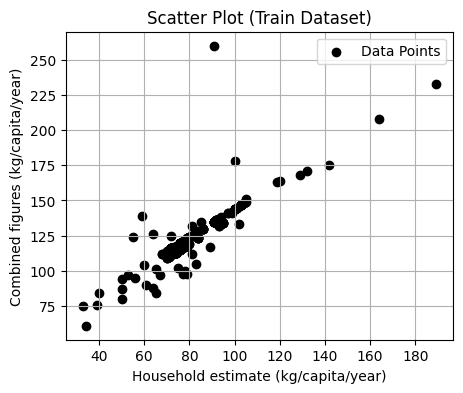

In [ ]:
# Scatter plot
plt.figure(figsize=(5, 4))
plt.scatter(df1['Household estimate (kg/capita/year)'], df1['combined figures (kg/capita/year)'], c='black', label='Data Points')
plt.xlabel('Household estimate (kg/capita/year)')
plt.ylabel('Combined figures (kg/capita/year)')
plt.title('Scatter Plot (Train Dataset)')
plt.legend()
plt.grid(True)
plt.show()


# **Step 3: Model Selection, Training, Predictions, and Evaluation**
1. **Model Selection:**
Identify and choose appropriate machine learning models based on the dataset and problem type include linear regression, decision trees, and random forests. The goal is to test multiple models to determine the best-performing one.

2. **Model Training:**
Split the dataset into training and testing sets, scalling the data then training the selected models on the training data. This involves allowing the models to learn patterns and relationships within the dataset.

3. **Making Predictions:**
Use the trained models to make predictions on the test data. This step evaluates how well the models generalize to unseen data.

4. **Model Evaluation:**
Assess the performance of the models using evaluation metrics like Mean Squared Error (MSE), R-squared (R²), or classification accuracy. This step helps identify the most effective model for the task at hand.

In [ ]:
# Features (predictors)
X = df1[['Household estimate (kg/capita/year)',
        'Retail estimate (kg/capita/year)',
        'Food service estimate (kg/capita/year)',]]

#Target Variable
y = df1['combined figures (kg/capita/year)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [ ]:
# Standardize the features
scaler =  StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize the SGDRegressor
model_Regressor = SGDRegressor(
    max_iter=1000,
    eta0=0.01,
    learning_rate="constant",
    tol=1e-3,
    random_state=101
)

# Train the model
model_Regressor.fit(X_train_scaled, y_train)

# Making Predictions
y_test_pred = model_Regressor.predict(X_test_scaled)
y_train_pred = model_Regressor.predict(X_train_scaled)

# Evaluate the model on the test set
rmse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

#Evaluate the model on the train set
rmse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Linear Regression:")
print(f"Testing Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Testing R-squared (R2): {r2_test:.4f}")
print(f"Testing Mean Absolute Error (MAE): {mae_test:.4f}")
print()
print(f"Training Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Training R-squared (R2): {r2_train:.4f}")
print(f"Training Mean Absolute Error (MAE): {mae_train:.4f}")


Linear Regression:
Testing Mean Squared Error (RMSE): 0.0000
Testing R-squared (R2): 1.0000
Testing Mean Absolute Error (MAE): 0.0017

Training Mean Squared Error (RMSE): 0.0000
Training R-squared (R2): 1.0000
Training Mean Absolute Error (MAE): 0.0017


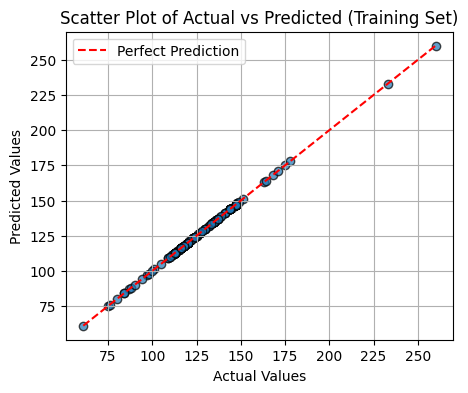

In [ ]:
# Plot for the training set
plt.figure(figsize=(5, 4))
plt.scatter(y_train, y_train_pred, alpha=0.7, edgecolors='k')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title("Scatter Plot of Actual vs Predicted (Training Set)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# **Optimized Hyperparameters for SGDRegressor**

The SGDRegressor leverages Stochastic Gradient Descent for linear regression tasks, making it highly efficient for large datasets. Optimizing hyperparameters such as max_iter (maximum iterations), eta0 (initial learning rate), learning_rate strategy, alpha (regularization strength), and tol (tolerance for convergence) improves its performance by enhancing convergence speed, reducing errors, and preventing overfitting. With tuned parameters, the model achieves better generalization and accuracy on unseen test data, making it a powerful choice for scalable regression tasks.

In [ ]:

# Initialize SGDRegressor with optimized hyperparameters
optimized_model = SGDRegressor(
    max_iter=2000,
    tol=1e-4,
    learning_rate="adaptive",
    eta0=0.001,
    penalty="l2",
    alpha=0.01,
    random_state=42
)

# Train the optimized model
optimized_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_optimized = optimized_model.predict(X_test_scaled)
y_train_pred_optimized = optimized_model.predict(X_train_scaled)

# Evaluate the optimized model
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)

#Train set
mse_train_optimized = mean_squared_error(y_train, y_train_pred_optimized)
r2_train_optimized = r2_score(y_train, y_train_pred_optimized)
mae_train_optimized = mean_absolute_error(y_train, y_train_pred_optimized)

print("\nOptimized Linear Regression:")
print(f"Mean Squared Error (MSE): {mse_optimized:.4f}")
print(f"R-squared (R2): {r2_optimized:.4f}")
print(f"Mean Absolute Error (MAE): {mae_optimized:.4f}")
print()
print(f"Training Mean Squared Error (MSE): {mse_train_optimized:.4f}")
print(f"Training R-squared (R2): {r2_train_optimized:.4f}")
print(f"Training Mean Absolute Error (MAE): {mae_train_optimized:.4f}")





Optimized Linear Regression:
Mean Squared Error (MSE): 0.0349
R-squared (R2): 0.9999
Mean Absolute Error (MAE): 0.1403

Training Mean Squared Error (MSE): 0.0398
Training R-squared (R2): 0.9999
Training Mean Absolute Error (MAE): 0.1477


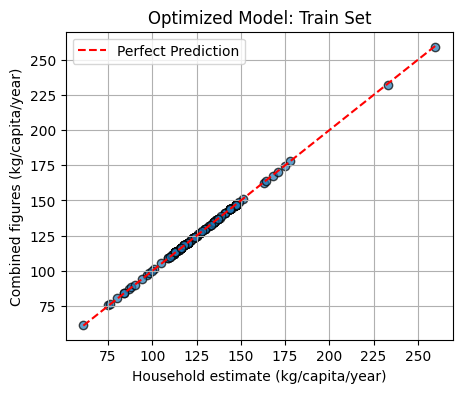

In [ ]:
# Scatter plot: Train Set
plt.figure(figsize=(5, 4))

# Scatter actual vs predicted
plt.scatter(y_train, y_train_pred_optimized, alpha=0.7, edgecolors='k')

# Add a line for perfect predictions
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    color='red',
    linestyle='--',
    label='Perfect Prediction'
)

# Improve visibility of the line
plt.xlim(y_train.min() - 10, y_train.max() + 10)
plt.ylim(y_train.min() - 10, y_train.max() + 10)

# Add labels, legend, and title
plt.title("Optimized Model: Train Set")
plt.xlabel('Household estimate (kg/capita/year)')
plt.ylabel('Combined figures (kg/capita/year)')
plt.legend()
plt.grid(True)
plt.show()


# **Model Comparison (Decison tree and Random Forest)**

This evaluation compares Linear Regression, Decision Tree, and Random Forest models based on their performance metrics (RMSE, R², MAE):

Linear Regression performs exceptionally well, with the lowest RMSE (0.0000), highest R² (1.0000), and minimal MAE (0.0017), indicating near-perfect accuracy and fit.

Random Forest shows strong performance, with a higher R² (0.9218) and reasonable errors, making it a robust choice for more complex patterns.

Decision Tree underperforms, with higher RMSE (6.4915) and a lower R² (0.8850), suggesting overfitting and limited generalization.

Conclusion: Linear Regression is the best-performing model, delivering superior accuracy and reliability compared to the Decision Tree and Random Forest models.












In [ ]:
# Random Forest Model
rf_model = RandomForestRegressor(random_state=101)
rf_model.fit(X_train, y_train)

#Predict the model
Y_pred_rf = rf_model.predict(X_test)
Y_train_pred_rf = rf_model.predict(X_train)

# Evaluate Random Forest Test
rmse_rf = np.sqrt(mean_squared_error(y_test, Y_pred_rf))
r2_score_rf = r2_score(y_test, Y_pred_rf)
mae_rf = mean_absolute_error(y_test, Y_pred_rf)

#Evaluate for train
rmse_train_rf = np.sqrt(mean_squared_error(y_train, rf_model.predict(X_train)))
r2_train_rf = r2_score(y_train, rf_model.predict(X_train))
mae_train_rf = mean_absolute_error(y_train, rf_model.predict(X_train))

# Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
Y_pred_dt = dt_model.predict(X_test)
Y_train_pred_dt = dt_model.predict(X_train)

# Evaluate Decision Tree tEST
rmse_dt = np.sqrt(mean_squared_error(y_test, Y_pred_dt))
r2_score_dt = r2_score(y_test, Y_pred_dt)
mae_dt = mean_absolute_error(y_test, Y_pred_dt)

#Eveluate for train
rmse_train_dt = np.sqrt(mean_squared_error(y_train, dt_model.predict(X_train)))
r2_train_dt = r2_score(y_train, dt_model.predict(X_train))
mae_train_dt = mean_absolute_error(y_train, dt_model.predict(X_train))


# Model Metrics Dictionary (Includes Train and Test Metrics)
model_rank = {
    "Linear Regression": {
        "Test RMSE": f"{rmse_test:.4f}",
        "Test R2 Score": f"{r2_test:.4f}",
        "Test MAE": f"{mae_test:.4f}",
        "Train RMSE": f"{rmse_train:.4f}",
        "Train R2 Score": f"{r2_train:.4f}",
        "Train MAE": f"{mae_train:.4f}",
    },
    "Decision Tree": {
        "Test RMSE": f"{rmse_dt:.4f}",
        "Test R2 Score": f"{r2_score_dt:.4f}",
        "Test MAE": f"{mae_dt:.4f}",
        "Train RMSE": f"{rmse_train_dt:.4f}",
        "Train R2 Score": f"{r2_train_dt:.4f}",
        "Train MAE": f"{mae_train_dt:.4f}",
    },
    "Random Forest": {
        "Test RMSE": f"{rmse_rf:.4f}",
        "Test R2 Score": f"{r2_score_rf:.4f}",
        "Test MAE": f"{mae_rf:.4f}",
        "Train RMSE": f"{rmse_train_rf:.4f}",
        "Train R2 Score": f"{r2_train_rf:.4f}",
        "Train MAE": f"{mae_train_rf:.4f}",
    },
}

# Print Model Metrics
print("\nModel Metrics (Train and Test):")
for model, metrics in model_rank.items():
    print(f"Model: {model}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    print()



Model Metrics (Train and Test):
Model: Linear Regression
  Test RMSE: 0.0000
  Test R2 Score: 1.0000
  Test MAE: 0.0017
  Train RMSE: 0.0000
  Train R2 Score: 1.0000
  Train MAE: 0.0017

Model: Decision Tree
  Test RMSE: 6.4915
  Test R2 Score: 0.8850
  Test MAE: 2.4651
  Train RMSE: 0.0000
  Train R2 Score: 1.0000
  Train MAE: 0.0000

Model: Random Forest
  Test RMSE: 5.3529
  Test R2 Score: 0.9218
  Test MAE: 2.0647
  Train RMSE: 4.1882
  Train R2 Score: 0.9662
  Train MAE: 0.9184



# **Step 4: Visualization of Results**

This visualization compares the performance of three models—Linear Regression, Decision Tree, and Random Forest—by plotting Actual vs. Predicted Values in subplots.

**Each subplot shows:**
Blue Scatter Points: Actual vs. predicted values for a model.
Red Dashed Line: Perfect fit line (y = x), representing ideal predictions.

The closer the points are to the red line, the better the model's predictions.
Purpose: To visually assess and compare the accuracy of predictions across the models, helping identify the best-performing one.

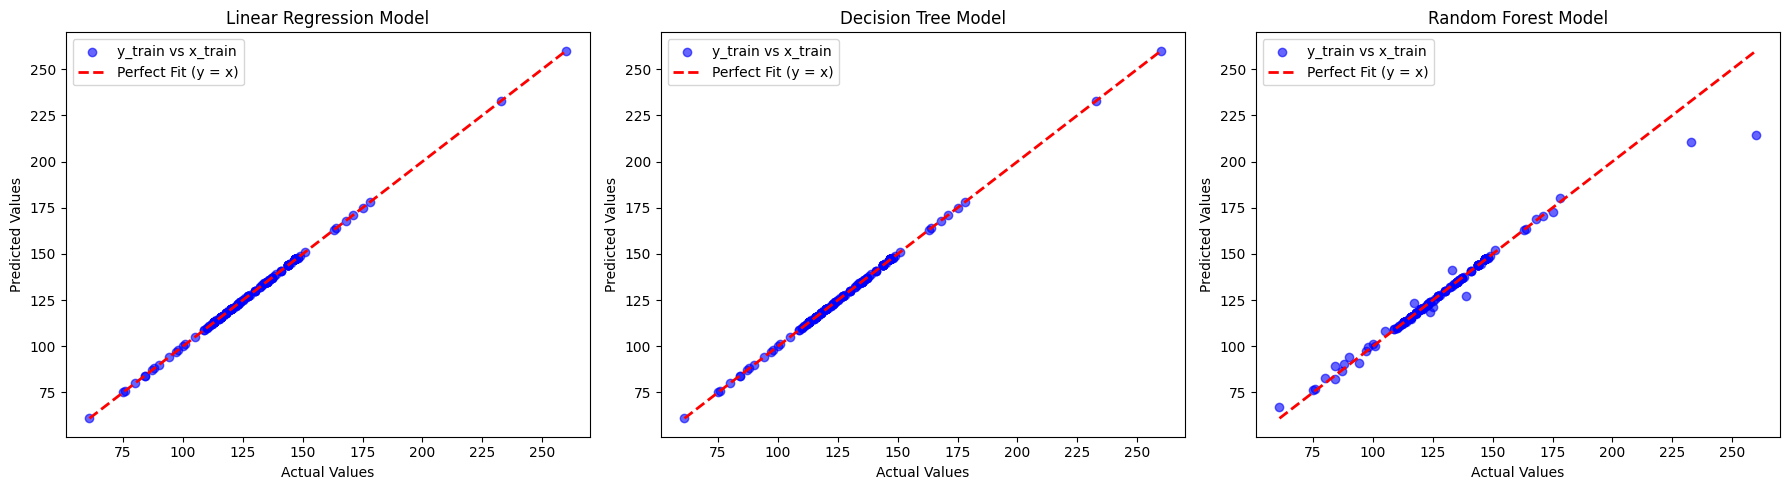

In [ ]:
# Define data for the models
results = {
    "Linear Regression": {"predictions": y_train_pred},
    "Decision Tree": {"predictions": Y_train_pred_dt},
    "Random Forest": {"predictions": Y_train_pred_rf},
}

# Create the subplots
plt.figure(figsize=(18, 5))

# Custom titles for each model
custom_titles = {
    "Linear Regression": "Linear Regression Model",
    "Decision Tree": "Decision Tree Model",
    "Random Forest": "Random Forest Model",
}

# Determine the range for the "Perfect Fit" line across all models
min_value = min(y_train.min(), min(result["predictions"].min() for result in results.values()))
max_value = max(y_train.max(), max(result["predictions"].max() for result in results.values()))

# Plot each model's predictions
for i, (name, result) in enumerate(results.items(), 1):
    plt.subplot(1, 3, i)  # Arrange in 1 row, 3 columns
    plt.scatter(y_train, result["predictions"], alpha=0.6, color="blue", label="y_train vs x_train")
    plt.plot([min_value, max_value], [min_value, max_value], 'r--', lw=2, label="Perfect Fit (y = x)")
    plt.title(f"{custom_titles[name]}")  # Use custom titles
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# **Step 5 : Comparison of Models**

This code identifies the best-performing model by comparing the Root Mean Squared Error (RMSE) across models stored in model_rank.

**Process:**
Finds the model with the lowest RMSE using the min() function.

Outputs the name and RMSE of the best model.

**Purpose:**
To determine the most accurate model by minimizing prediction errors (RMSE).
Outcome: The model with the lowest RMSE is selected as the best, providing insights into its superior predictive performance compared to others.

In [ ]:
# Find the best model based on Test RMSE
best_model_name = min(
    model_rank.items(),
    key=lambda x: float(x[1]["Test RMSE"])
)[0]

# Output the best model and its metrics
best_metrics = model_rank[best_model_name]

# Print the best model and its metrics
print(f"Best Model: {best_model_name}")
print(f"Metrics: Test RMSE = {best_metrics['Test RMSE']}")
print(f"Metrics: Test R2 Score = {best_metrics['Test R2 Score']}")
print(f"Metrics: Test MAE = {best_metrics['Test MAE']}")


Best Model: Linear Regression
Metrics: Test RMSE = 0.0000
Metrics: Test R2 Score = 1.0000
Metrics: Test MAE = 0.0017


In [ ]:


# Dictionary to map model names to their objects
model_objects = {
    "Linear Regression": model_Regressor,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
}

# Get the best model object
best_model = model_objects[best_model_name]


print(f"The best model) is: {best_model_name}")


The best model) is: Linear Regression


# **Step 6: Saving the Model:**

After identifying the best-performing model during the evaluation stage, it is saved for future use. Using the joblib library, the model is serialized and stored as a file named "Food_waste Analysis By Country.joblib". This ensures the model can be reloaded later without the need for retraining, saving time and computational resources.

In [ ]:

# Save the best model
model_filename = "Food_waste_Analysis_By_Country.joblib"
joblib.dump(best_model, model_filename)

# Save the scaler
scaler_filename = "scaler_model.joblib"
joblib.dump(scaler, scaler_filename)

print("Model and Scaler have been saved successfully.")


Model and Scaler have been saved successfully.


# **Step 7:  Single Data Point Prediction**

This code demonstrates how to use a pre-trained model (Loaded_model) to make a prediction for a single data point from the test dataset.

**Process:**
The function predict uses the loaded model to predict the target value for the first row (test_data[0]) of the test dataset.
The prediction is extracted from the returned array (result[0]) and printed.

**Purpose:**
To test the model's ability to predict a single instance.
Useful for debugging, validating model accuracy, or making predictions in real-time scenarios.

**Outcome:** Outputs the predicted value for the selected test data point.

In [ ]:
# Create the comparison DataFrame
comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_test_pred
})

# Display the first few rows
print(comparison.head())

     Actual   Predicted
74      102  101.999125
172     119  119.000056
65      136  135.999338
184     116  116.001659
151      95   95.002842


In [ ]:
# Load the trained model
loaded_model = joblib.load('Food_waste_Analysis_By_Country.joblib')

# Load the scaler
scaler_loaded = joblib.load('scaler_model.joblib')

# Define the prediction function
def predict(test_data, loaded_model, scaler_loaded):
    # Scale the test data using the loaded scaler
    test_data_scaled = scaler_loaded.transform(test_data)

    # Predict using the loaded model
    return loaded_model.predict(test_data_scaled)

# Test the prediction
result = predict(X_test, loaded_model, scaler_loaded)

# Print the result for the first test data point
print("Prediction for the first test data point:", result[0])


Prediction for the first test data point: 101.99912546007666
